In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from uszipcode import ZipcodeSearchEngine
from pprint import pprint
import pandas as pd
import numpy as np
from citipy import citipy
from scipy.stats import sem

In [2]:
#Dependencies to merge the csv's
#Import packages
import os
import glob
import csv

In [3]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Files to Load
#File for 2019
csv_2019_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2019.csv")
#File for 2018
csv_2018_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2018.csv")
#File for 2017
csv_2017_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2017.csv")
#File for 2016
csv_2016_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2016.csv")
#File for 2015
csv_2015_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2015.csv")
#File for 2014
csv_2014_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2014.csv")
#File for 2013
csv_2013_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2013.csv")
#File for 2012
csv_2012_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2012.csv")
#File for 2011
csv_2011_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2011.csv")
#File for 2010
csv_2010_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2010.csv")
#File for 2009
csv_2009_df=pd.read_csv("../Project1_DC_Crime_Analysis/Resources/Crime_Incidents_in_2009.csv")

In [5]:
#Count the number of rows in each file
#csv_2019_df["REPORT_DAT"].count() #27145
#csv_2018_df["REPORT_DAT"].count() #33783
#csv_2017_df["REPORT_DAT"].count() #33116
#csv_2016_df["REPORT_DAT"].count() #37227
#csv_2015_df["REPORT_DAT"].count() #37328
#csv_2014_df["REPORT_DAT"].count() #38438
#csv_2013_df["REPORT_DAT"].count() #35895
#csv_2012_df["REPORT_DAT"].count() #35317
#csv_2011_df["REPORT_DAT"].count() #33292
#csv_2010_df["REPORT_DAT"].count() #31676
#csv_2009_df["REPORT_DAT"].count() #31312

In [6]:
#Use glob to match the pattern ‘csv’
#Match the pattern (‘csv’) and save the list of file names in the ‘all_files’ variable.
#extension = 'csv'
#Use pandas to concatenate all files in the list and export as CSV. 
#The output file is named “dc_crimes.csv” located in your working directory.
#combine all files in the list
path = '../Project1_DC_Crime_Analysis/Resources/'
all_files = glob.glob(path + "/*.csv")
all_files
row = []

for filename in all_files:
   df = pd.read_csv(filename, index_col=None, header=0)
   row.append(df)

dc_crimes = pd.concat(row, axis=0, ignore_index=True)

#Convert to DataFrame
dc_crimes_df=pd.DataFrame(dc_crimes)
dc_crimes_df.count()
dc_crimes_df.head(2)
dc_crimes_df.to_csv("../dc_crimes.csv",index=False,header=True,encoding='utf-8-sig')

In [7]:
#Save the csv of all merged data
dc_crimes_df.to_csv("../dc_crimes_2009_2019.csv",index=False,header=True,encoding='utf-8-sig')

In [8]:
# Loc for CCN - 14148057
dc_crimes_df.loc[dc_crimes_df["CCN"]==14148057,:]
#dc_crimes_df.columns

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
119019,-77.021921,38.912462,14148057,2014-09-27T07:49:00.000Z,DAY,OTHERS,THEFT/OTHER,1624 - 1699 BLOCK OF 7TH STREET NW,398099.0,138288.0,...,004901 1,4901.0,Precinct 21,38.912454,-77.021919,NaN,1914-09-26T19:00:00.000Z,2014-09-27T07:00:00.000Z,356685986,14148057-01


In [9]:
#Split the data in START_DATE column to get Date and Time information
dc_crimes_df[['START_DATE','Start_Time']] = dc_crimes_df['START_DATE'].str.split('T',expand=True)
dc_crimes_df[['REPORT_DAT','Report_Time']] = dc_crimes_df['REPORT_DAT'].str.split('T',expand=True)
dc_crimes_df[['END_DATE','End_Time']] = dc_crimes_df['END_DATE'].str.split('T',expand=True)
#pd.to_datetime(dc_crimes_df["START_DATE"])

In [10]:
#Display the data
dc_crimes_df.head(2)

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID,Start_Time,Report_Time,End_Time
0,-77.039673,38.903151,8005297,2009-01-12,DAY,OTHERS,BURGLARY,1000 - 1099 BLOCK OF CONNECTICUT AVENUE NW,396559.0,137255.0,...,38.903143,-77.039670,GOLDEN TRIANGLE,2008-12-28,NaN,356048194,08005297-01,00:00:00.000Z,10:30:00.000Z,NaN
1,-76.999518,38.904689,162302,2009-11-12,EVENING,OTHERS,MOTOR VEHICLE THEFT,1100 - 1199 BLOCK OF 5TH STREET NE,400042.0,137425.0,...,38.904682,-76.999516,NaN,2009-11-06,2009-11-12,356046669,00162302-01,12:00:00.000Z,18:00:00.000Z,17:00:00.000Z


In [11]:
#Determine Day of the week and Week number
#Use the to_datetime function of Pandas
dc_crimes_df['START_DATE'] = pd.to_datetime(dc_crimes_df['START_DATE'])
dc_crimes_df['Day_of_Week'] = dc_crimes_df['START_DATE'].dt.day_name()
dc_crimes_df['Week_Number'] = dc_crimes_df['START_DATE'].dt.week


#Splitting the Day, Month and Year to new columns
dc_crimes_df['Day'] = dc_crimes_df ['START_DATE'].dt.day
dc_crimes_df['Month'] = dc_crimes_df['START_DATE'].dt.month
dc_crimes_df['Year'] = dc_crimes_df['START_DATE'].dt.year

#The above conversions result in float values - Convert them to integers

dc_crimes_df['Day']=dc_crimes_df['Day'].fillna(0.0).astype(int)
dc_crimes_df['Month']=dc_crimes_df['Month'].fillna(0.0).astype(int)
dc_crimes_df['Year']=dc_crimes_df['Year'].fillna(0.0).astype(int)

#Display the output
dc_crimes_df[["START_DATE","REPORT_DAT","END_DATE","OFFENSE","Day_of_Week","Week_Number","Day","Month","Year"]].head()
#dc_crimes_df.Day.dtype

,START_DATE,REPORT_DAT,END_DATE,OFFENSE,Day_of_Week,Week_Number,Day,Month,Year
0,2008-12-28,2009-01-12,NaN,BURGLARY,Sunday,52.0,28,12,2008
1,2009-11-06,2009-11-12,2009-11-12,MOTOR VEHICLE THEFT,Friday,45.0,6,11,2009
2,2009-12-06,2009-12-06,2009-12-06,THEFT F/AUTO,Sunday,49.0,6,12,2009
3,2002-01-26,2009-10-20,2002-01-26,THEFT/OTHER,Saturday,4.0,26,1,2002
4,2005-04-30,2009-10-20,2005-04-30,ASSAULT W/DANGEROUS WEAPON,Saturday,17.0,30,4,2005


In [12]:
#Counts - Data Profiling
dc_crimes_df.count()
dc_crimes_copy=dc_crimes_df.copy()

In [13]:
# Drop the unnecessary columns
dc_crimes_df.drop(['XBLOCK', 'YBLOCK','Start_Time','Report_Time','End_Time',
                   'X','Y','ANC','BLOCK_GROUP',
                   'CENSUS_TRACT','VOTING_PRECINCT',
                   'BID','OBJECTID','OCTO_RECORD_ID','BID'],axis=1,inplace=True)
dc_crimes_df.count()

CCN                     374403
REPORT_DAT              374403
SHIFT                   374403
METHOD                  374403
OFFENSE                 374403
BLOCK                   374402
WARD                    374392
DISTRICT                374201
PSA                     374173
NEIGHBORHOOD_CLUSTER    369548
LATITUDE                374403
LONGITUDE               374403
START_DATE              374393
END_DATE                352236
Day_of_Week             374393
Week_Number             374393
Day                     374403
Month                   374403
Year                    374403
dtype: int64

In [14]:
#Reorganizing the columns
dc_crimes_df=dc_crimes_df[["CCN","START_DATE","END_DATE","Day_of_Week","Week_Number","Day","Month","Year",
                            "LATITUDE","LONGITUDE","BLOCK","NEIGHBORHOOD_CLUSTER",
                            "METHOD","OFFENSE","PSA",
                            "SHIFT","WARD","DISTRICT",
                            "REPORT_DAT"]]
dc_crimes_df.count()

CCN                     374403
START_DATE              374393
END_DATE                352236
Day_of_Week             374393
Week_Number             374393
Day                     374403
Month                   374403
Year                    374403
LATITUDE                374403
LONGITUDE               374403
BLOCK                   374402
NEIGHBORHOOD_CLUSTER    369548
METHOD                  374403
OFFENSE                 374403
PSA                     374173
SHIFT                   374403
WARD                    374392
DISTRICT                374201
REPORT_DAT              374403
dtype: int64

In [15]:
#Find the columns that have null values in them - Find the count of null values in a column
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                 10
END_DATE                22167
Day_of_Week                10
Week_Number                10
Day                         0
Month                       0
Year                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       1
NEIGHBORHOOD_CLUSTER     4855
METHOD                      0
OFFENSE                     0
PSA                       230
SHIFT                       0
WARD                       11
DISTRICT                  202
REPORT_DAT                  0
dtype: int64

In [16]:
#Deleting rows that have null values in them - Retain END_DATE ( to analyze open cases if required)
dc_crimes_df = dc_crimes_df.dropna(axis=0, subset=['START_DATE','NEIGHBORHOOD_CLUSTER','BLOCK',
                                                  'PSA','WARD','DISTRICT'])
dc_crimes_df.isna().sum()

CCN                         0
START_DATE                  0
END_DATE                21879
Day_of_Week                 0
Week_Number                 0
Day                         0
Month                       0
Year                        0
LATITUDE                    0
LONGITUDE                   0
BLOCK                       0
NEIGHBORHOOD_CLUSTER        0
METHOD                      0
OFFENSE                     0
PSA                         0
SHIFT                       0
WARD                        0
DISTRICT                    0
REPORT_DAT                  0
dtype: int64

In [17]:
dc_crimes_df.count()

CCN                     369302
START_DATE              369302
END_DATE                347423
Day_of_Week             369302
Week_Number             369302
Day                     369302
Month                   369302
Year                    369302
LATITUDE                369302
LONGITUDE               369302
BLOCK                   369302
NEIGHBORHOOD_CLUSTER    369302
METHOD                  369302
OFFENSE                 369302
PSA                     369302
SHIFT                   369302
WARD                    369302
DISTRICT                369302
REPORT_DAT              369302
dtype: int64

In [18]:
# # #Any Duplicate incidents?
dc_crimes_df['Dup_CCN'] = dc_crimes_df.groupby('CCN')['CCN'].transform('size')
dc_crimes_df['Dup_CCN']
dc_crimes_df_sorted=dc_crimes_df.sort_values("Dup_CCN",ascending=False)
dc_crimes_df_sorted['Dup_CCN']

309430    12
309423    12
309429    12
309428    12
309427    12
309426    12
309431    12
309432    12
309422    12
309425    12
309421    12
309424    12
167875     4
167876     4
167877     4
137384     4
31304      3
84189      3
342712     3
84190      3
84191      3
374379     3
342713     3
31303      3
342711     3
374380     3
374381     3
374386     3
374387     3
374388     3
          ..
124873     1
124872     1
124871     1
124870     1
124869     1
124868     1
124867     1
124886     1
124887     1
124888     1
124899     1
124907     1
124906     1
124905     1
124904     1
124903     1
124902     1
124901     1
124900     1
124898     1
124889     1
124897     1
124896     1
124895     1
124894     1
124893     1
124892     1
124891     1
124890     1
187208     1
Name: Dup_CCN, Length: 369302, dtype: int64

In [19]:
#Delete duplicate Incident Data
dc_crimes_df_sorted.drop_duplicates(subset ="CCN",keep = False, inplace = True)
dc_crimes_df_sorted['Dup_CCN']
dc_crimes_df_sorted.count()

CCN                     369103
START_DATE              369103
END_DATE                347242
Day_of_Week             369103
Week_Number             369103
Day                     369103
Month                   369103
Year                    369103
LATITUDE                369103
LONGITUDE               369103
BLOCK                   369103
NEIGHBORHOOD_CLUSTER    369103
METHOD                  369103
OFFENSE                 369103
PSA                     369103
SHIFT                   369103
WARD                    369103
DISTRICT                369103
REPORT_DAT              369103
Dup_CCN                 369103
dtype: int64

In [20]:
# # There are some incidents that started before 2009 but were reported after 2009
var=dc_crimes_df_sorted.loc[dc_crimes_df_sorted["Year"]<2009,"CCN"]
var.count()
# dc_crimes_df["START_DATE"].count()

378

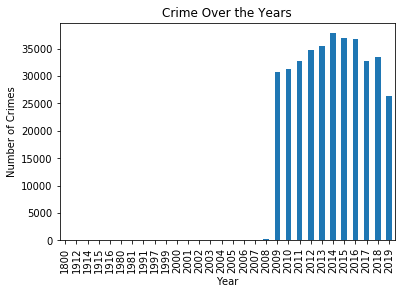

In [21]:
#Plot crimes per year
dc_crimes_df_sorted.groupby([dc_crimes_df_sorted.Year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

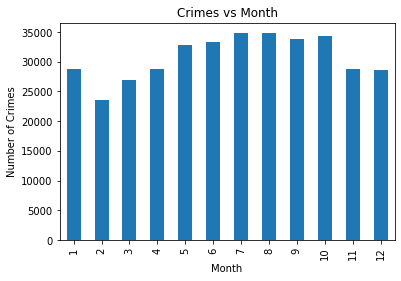

In [22]:
#Plot crimes per month
dc_crimes_df.groupby([dc_crimes_df.Month]).size().plot.bar()
plt.title('Crimes vs Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

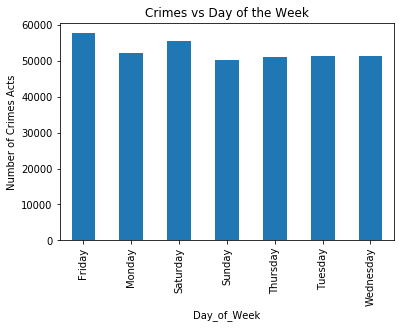

In [23]:
#Plot crimes crimes per day of the week
dc_crimes_df_sorted.groupby([dc_crimes_df_sorted.Day_of_Week]).size().plot.bar()
plt.title('Crimes vs Day of the Week')
plt.xlabel('Day_of_Week')
plt.ylabel('Number of Crimes Acts')
plt.show()

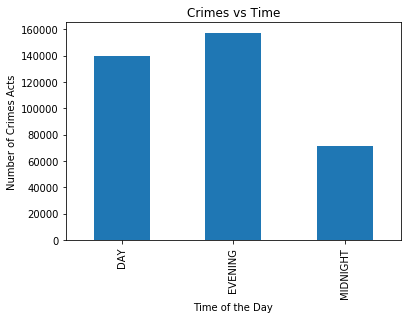

In [24]:
#Plot crimes crimes per Time of the day
dc_crimes_df_sorted.groupby([dc_crimes_df_sorted.SHIFT]).size().plot.bar()
plt.title('Crimes vs Time')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [25]:
#Distribution of each type of crime
dc_crimes_df_sorted.columns
dc_crimes_df_sorted["OFFENSE"].unique()
dc_crimes_df_sorted["OFFENSE"].value_counts()

THEFT/OTHER                   139393
THEFT F/AUTO                  105728
ROBBERY                        34683
MOTOR VEHICLE THEFT            31835
BURGLARY                       29899
ASSAULT W/DANGEROUS WEAPON     23418
SEX ABUSE                       2613
HOMICIDE                        1260
ARSON                            274
Name: OFFENSE, dtype: int64

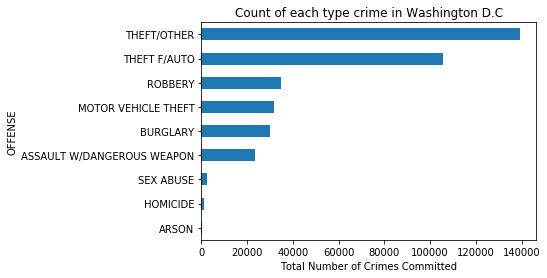

In [26]:
#Offense Plot - Bar Graph
dc_crimes_df_sorted.groupby(dc_crimes_df_sorted['OFFENSE']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Total Number of Crimes Committed')
plt.title("Count of each type crime in Washington D.C")
plt.show()

# Analysis 
It appears that the most common type of Offense is: Theft 

# Analyzing the trend for different types of Offenses over the years

In [ ]:
#THEFT/OTHER                   141605
#THEFT F/AUTO                  106850
#ROBBERY                        35171
#MOTOR VEHICLE THEFT            32388
#BURGLARY                       30229
#ASSAULT W/DANGEROUS WEAPON     23757
#SEX ABUSE                       2750
#HOMICIDE                        1374
#ARSON                            279
#dc_crimes_df.columns

In [ ]:
# gather yearly count of "Theft from Vehicle" crime 
#theft = dc_crimes_df[dc_crimes_df["OFFENSE"]=="THEFT/OTHER"]
#theft_yearly= theft["Year"].value_counts(sort=False)
#theft_yearly

In [ ]:
#Extract the information for x-axis (i.e years)
#x_axis = theft_yearly.index.tolist()
#x_axis

In [ ]:
#plt.plot(x_axis, theft_yearly, label = "Trend for Theft/Other") 

In [ ]:
# #Finding Neighbourhoods
# dc_crimes_df.columns
# dc_crimes_df["BLOCK"].unique()

In [ ]:
# #Top 10 crime blocks
# dc_crimes_df["BLOCK"].value_counts()[:10].plot.bar(title='Top 10 Dangerous Blocks')

In [ ]:
# plt.scatter(dc_crimes_df['LONGITUDE'], dc_crimes_df['LATITUDE'], s=0.5, alpha=0.3, color="brown", lw=0)

In [ ]:
#Export the city data into a .csv. -"Should be the final step"
#dc_crimes_df.to_csv("../dc_crimes.csv",index=False,header=True,encoding='utf-8-sig')
#encoding also exports any non-english data

In [ ]:
# df1 = dc_crimes_df['BLOCK'].str.extract('(?P<number>\d+)(?P<name>.*)', expand=True)
# print (df1)

In [27]:
copy_df=dc_crimes_df_sorted.copy()
copy_df[['BLOCK','Street_Name']] = dc_crimes_df_sorted['BLOCK'].str.split('BLOCK OF ',expand=True)
copy_df[['BLOCK','Street_Name']].head(2)
#copy_df.loc[copy_df["Street_Name"]=="None",:]

,BLOCK,Street_Name
249524,3239 - 3399,THEODORE R HAGANS DRIVE NE
249520,PENNSYLVANIA AVENUE SE AND D STREET SE,None


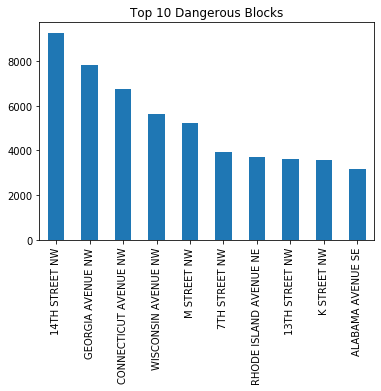

In [28]:
copy_df["Street_Name"].value_counts()[:10].plot.bar(title='Top 10 Dangerous Blocks')